## <center>Fancy Indexing, Sorting, Aggregations and more ..</center>

    This notebook introduces concepts of fancy indexing, sorting, aggregations, masking, set operations and 
    various others that demonstrates the computational efficiency of NumPy in the data science world.
   
    The topics covered in this notebook are as follows:
       
    1. Fancy Indexing
        
        - Fancy Indexing a one-dimension array
        - Fancy Indexing a multi-dimension array
        - Combining Fancy Indexing and Simple Indices
        - Combining Fancy Indexing and Slicing
        - Combining Fancy Indexing and Masking Operations
        
    2. Sorting Arrays
    
        - Sorting a one-dimensional array
        - Sorting a multi-dimensional array
        - Partial Sorts : Partitioning a one-dimensional array
        - Partial Sorts : Partitioning a multi-dimensional array
      
    3. Aggregations (also called "Reductions")**
      
        - Mathematical and Statistical Methods
        - Methods for Boolean Arrays
        - Masking Operations and Aggregates
        - Boolean Masks  
        
    4. Set Operations**
    
        - np.unique
        - np.in1d()
        - np.intersect1d()
        - np.union1d()
        - np.setdiff1d()
        - np.setxor1d()
        
    5. Other Topics
        
        - np.where** : Expressing Conditional Logic as Array Operation 
        - np.count_nonzero** : Counts the number of True entries 

    **explained using real world datasets from energy markets and finance

In [2]:
# Importing numpy
import numpy as np

### <center>Fancy Indexing</center>
    
     It is similar to simple indexing, but, arrays are passed as index instead of scalars.
     The shape of the result reflects the shape of the index arrays rather than the shape of the array 
     being indexed.
     
     Simple Indexing: arr[3],arr[:3,:]
     Advanced Indexing : arr[x,y] where x and y are both arrays
     
     Listed below are some of the operations possible with fancy indexing :
     
         Fancy Indexing a one-dimension array
         Fancy Indexing a multi-dimension array
         Combining Fancy Indexing and Simple Indices
         Combining Fancy Indexing and Slicing
         Combining Fancy Indexing and Masking Operations

>#### Fancy Indexing a one-dimension array

In [16]:
# Consider a one-dimension array
arr_onedim = np.random.randint(6,42,size=10)
print(f"Original array : {arr_onedim}")

# To access 4th,6th and 9th element
index_array = [3,5,8]
print(f'\nSelecting 4th,6th and 9th element of the array :\n{arr_onedim[index_array]}')

Original array : [28  7 19 35 27 16 21 15 15 10]

Selecting 4th,6th and 9th element of the array :
[35 16 15]


>#### Fancy Indexing a multi-dimension array

In [17]:
# Fancy Indexing a multi-dimension array
array_multi = np.arange(24).reshape((2,3,4))
array_multi

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [18]:
# To access corner elements of the 3D array above, we can use broadcasting technique along with fancy indexing
slab = np.array([0,1])
row=np.array([0,2])
col=np.array([0,3])
array_multi[slab[:,np.newaxis],row[:,np.newaxis],col]

array([[ 0,  3],
       [20, 23]])

> #### Fancy Indexing and Simple Indices

In [19]:
# Consider a 2D array
array_twodim = np.arange(15).reshape((3,5))
print(f"Original array : \n\n {array_twodim}")

# To access elements from same row or column, we can combing simple indexing with fancy indexing
print(f'\nAccessing 1st,3rd and 5th element of 3rd row :\n{array_twodim[2,[0,2,4]]}')

Original array : 

 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Accessing 1st,3rd and 5th element of 3rd row :
[10 12 14]


> #### Fancy Indexing and Slicing

In [20]:
# Combining fancy indexing with slicing we can extend the above operation to more than one row or column
# For example, to access elements from even columns and rows 2 and 3
print(f'\nAccessing elements from even columns and rows 2 and 3 :\n{array_twodim[1:,[0,2,4]]}')


Accessing elements from even columns and rows 2 and 3 :
[[ 5  7  9]
 [10 12 14]]


>#### Fancy Indexing and Masking Operations

In [21]:
# Creating a masking array which selects only first 2 columns
mask_index_array = np.array([1,1,0,0,0],dtype=bool)

# To select elements only on first and 3rd row
row = np.array([0,2])

array_twodim[row[:,np.newaxis],mask_index_array]

array([[ 0,  1],
       [10, 11]])

### <center>Sorting Arrays</center> 

     arr.sort() vs np.sort()
     
         The ndarray sort instance method is an in-place sort(i.e. The array contents are rearranged 
     without producing a new array) whereas numpy.sort creates a new, sorted copy of an array.
     
    We shall discuss the following with examples:
    
    Sorting        : One-dimensional array and Multi-dimensional array
    Partial Sorts  : One-dimensional array and Multi-dimensional array
    Indirect Sorts : np.argsort and np.lexsort
     
    Please Note : 
    1. np.sort uses 𝒪[NlogN] quicksort algorithm,though mergesort and heapsort are also available.
    2. np.argsort returns the indices of sorted list
    

>#### Sorting a one-dimensional array

In [22]:
# Creating a One-dimensional array
unsorted_array_onedim = np.random.randint(4,365,size=30)
print(f'Original Array : \n{unsorted_array_onedim}\n')

# Returns Sorted array
print(f'Sorted Array : \n {np.sort(unsorted_array_onedim)}')


Original Array : 
[254  36 340  57 362  12 235  38 329 102  33 319 199  82   7 351 194  45
  82 244 354 285 356 340 142 257 230 137 209 256]

Sorted Array : 
 [  7  12  33  36  38  45  57  82  82 102 137 142 194 199 209 230 235 244
 254 256 257 285 319 329 340 340 351 354 356 362]


>#### Sorting a multi-dimensional array

In [23]:
# Creating a multi-dimensional array
unsorted_array_multidim = np.random.randint(3,455,size=(3,4,5))
print(f'Original Array : \n\n {unsorted_array_multidim}')
# An optional argument axis will sort along the specified axis
print(f'\nSorted array along Axis 0 : \n\n{np.sort(unsorted_array_multidim,axis=0)}')

Original Array : 

 [[[218 161 263 172  33]
  [116 229  78  92 412]
  [319 246 205  87 395]
  [277 351 103 142  95]]

 [[343 101 255 137 340]
  [145 401 142 212 407]
  [278 269 134 315 215]
  [352 197 136 182 187]]

 [[199 259 286 105 279]
  [359 159 422 223   6]
  [327 396 240 450  91]
  [212 152 103 152 244]]]

Sorted array along Axis 0 : 

[[[199 101 255 105  33]
  [116 159  78  92   6]
  [278 246 134  87  91]
  [212 152 103 142  95]]

 [[218 161 263 137 279]
  [145 229 142 212 407]
  [319 269 205 315 215]
  [277 197 103 152 187]]

 [[343 259 286 172 340]
  [359 401 422 223 412]
  [327 396 240 450 395]
  [352 351 136 182 244]]]


>#### Partial Sorts : Partitioning a one-dimensional array
    
        Takes an input of an array and number k , resulting in an array with k smallest values to the left of the 
        array and remaining to the right in arbitrary order

In [24]:
# Consider a one-dimensional array
arr_part_onedim = np.random.randint(3,55,size=10)
print(f'Original Array : \n {arr_part_onedim}')

# Pushes 4 smallest values to the left of the array
np.partition(arr_part_onedim,4)

Original Array : 
 [32 53 24 13 52 20 30 24 26 30]


array([20, 13, 24, 24, 26, 30, 30, 32, 53, 52])

>#### Partial Sorts : Partitioning a multi-dimensional array

In [25]:
# Consider a multi-dimensional array
arr_part_multidim =  np.random.randint(3,55,size=(2,4,6))
print(f'Original Array : \n {arr_part_multidim}')

# Partitions along axis 1 with 2 smallest elements to the left of the array
np.partition(arr_part_multidim,2,axis=1)

Original Array : 
 [[[17 41  8 49 53 18]
  [48 38 52  5 39 16]
  [15 26 49 27  5 27]
  [29  3 30 18 17 15]]

 [[ 7 37  5 23 10 16]
  [47 15 41 35 40 16]
  [ 7 10  5 39 28 14]
  [38  4 44 54 38 11]]]


array([[[15,  3,  8,  5,  5, 15],
        [17, 26, 30, 18, 17, 16],
        [29, 38, 49, 27, 39, 18],
        [48, 41, 52, 49, 53, 27]],

       [[ 7,  4,  5, 23, 10, 11],
        [ 7, 10,  5, 35, 28, 14],
        [38, 15, 41, 39, 38, 16],
        [47, 37, 44, 54, 40, 16]]])

> #### Indirect Sorts : np.argsort

In [26]:
# Returns indices of sorted array
print(f'Original Array : \n {unsorted_array_onedim}')

indices_argsort = np.argsort(unsorted_array_onedim)
print(f'\nIndices of Sorted Array : \n {indices_argsort}')

# Sorted array can then be obtained by passing the sorted indices
unsorted_array_onedim[indices_argsort]

Original Array : 
 [254  36 340  57 362  12 235  38 329 102  33 319 199  82   7 351 194  45
  82 244 354 285 356 340 142 257 230 137 209 256]

Indices of Sorted Array : 
 [14  5 10  1  7 17  3 13 18  9 27 24 16 12 28 26  6 19  0 29 25 21 11  8
 23  2 15 20 22  4]


array([  7,  12,  33,  36,  38,  45,  57,  82,  82, 102, 137, 142, 194,
       199, 209, 230, 235, 244, 254, 256, 257, 285, 319, 329, 340, 340,
       351, 354, 356, 362])

In [27]:
# Now, lets consider the multidimensional array
# Consider a multi-dimensional array
unsorted_argsort_multidim =  np.random.randint(3,105,size=(3,4,5))
print(f'Original Array : \n {unsorted_argsort_multidim}')

Original Array : 
 [[[ 62  31  82  53  31]
  [ 27  63  54  28  76]
  [ 76  79  33  97  30]
  [ 45  99  39  81  53]]

 [[ 99  22  10  74  37]
  [ 86  65  64  40  18]
  [  7  38  28   7  37]
  [ 66  42  84  81  13]]

 [[100  91  89  98  59]
  [  5   7  45  66 100]
  [ 97   8  73  73   6]
  [ 23   7  38  49  82]]]


In [28]:
# Sorting multidimensional arrays are quite complicated; 
#To examine, lets sort the multidimensional array by Row 0 of each slab
np.array([unsorted_argsort_multidim[:,:,unsorted_argsort_multidim[:,0,:].argsort()[0]][0],
          unsorted_argsort_multidim[:,:,unsorted_argsort_multidim[:,0,:].argsort()[1]][1],
          unsorted_argsort_multidim[:,:,unsorted_argsort_multidim[:,0,:].argsort()[2]][2]])

array([[[ 31,  31,  53,  62,  82],
        [ 63,  76,  28,  27,  54],
        [ 79,  30,  97,  76,  33],
        [ 99,  53,  81,  45,  39]],

       [[ 10,  22,  37,  74,  99],
        [ 64,  65,  18,  40,  86],
        [ 28,  38,  37,   7,   7],
        [ 84,  42,  13,  81,  66]],

       [[ 59,  89,  91,  98, 100],
        [100,  45,   7,  66,   5],
        [  6,  73,   8,  73,  97],
        [ 82,  38,   7,  49,  23]]])

> #### Indirect Sorts : np.lexsort

In [29]:
# np.lexsort performs lexicographical sort on multiple key arrays
# Lets examine np.lexsort for sorting names by last name, first name
lastname = np.array(['Williams','Djokovic','Williams','Federer','Sampras','Murray','Agassi'])
firstname = np.array(['Venus','Novak','Serena','Roger','Pete','Andy','Andre'])
sorterarray = np.lexsort((firstname,lastname))
list(zip(lastname[sorterarray],firstname[sorterarray]))

[('Agassi', 'Andre'),
 ('Djokovic', 'Novak'),
 ('Federer', 'Roger'),
 ('Murray', 'Andy'),
 ('Sampras', 'Pete'),
 ('Williams', 'Serena'),
 ('Williams', 'Venus')]

### <center>Aggregations</center>

        One of the fundamental steps in analyzing huge data is computing summary statistics of the data.
      NumPy has various built-in Aggregation functions to accomplish the same.

      Aggregate functions take an optional input for 'axis' which will perform the aggregations row-
      wise(axis=1) or column-wise(axis =0). Below is a list of Aggregate methods with corresponding nan-safe 
      methods within the parenthesis.

      Mathematical methods :
      
        - sum (nansum)
        - prod (nanprod)
        
      Statistical methods :
        
        - mean (nanmean)
        - std (nanstd)
        - var (nanvar)
        - min (nanmin)
        - max (nanmax)
        - argmin (nanargmin)
        - argmax (nanargmax)
        - cumsum (nancumsum)
        - cumprod (nancumprod)
        - median (nanmedian)
        - percentile (nanpercentile)
      
      Methods for Boolean Arrays
      
        - any (Not applicable)
        - all (Not applicable)
        
   
       PLEASE NOTE : 
       1. The nan-safe versions of all aggregate functions omit nan values.
       2. If the optional argument 'axis' is omitted, the aggregation is performed on the whole array.
       


>**Mathematical and Statistical Methods**

In [30]:
# Creating an array to demonstrate Aggregations
arr_testagg = np.random.random((4,3))
arr_testagg

array([[0.13426573, 0.04840405, 0.90738886],
       [0.47304773, 0.67132658, 0.96662008],
       [0.82404182, 0.31829066, 0.15492189],
       [0.54457123, 0.53162212, 0.24624632]])

In [31]:
# Computes the sum of all elements in an array; an optional input "axis" will compute row-wise sum or column-wise sum

print(f'Sum of all elements in the array :\n{np.sum(arr_testagg)}')

print(f'\nSum of all elements in the array along axis 0/column-wise:\n{np.sum(arr_testagg,axis=0)}')

print(f'\nSum of all elements in the array along axis 1/row-wise:\n{np.sum(arr_testagg,axis=1)}')

Sum of all elements in the array :
5.820747084912215

Sum of all elements in the array along axis 0/column-wise:
[1.97592651 1.56964342 2.27517715]

Sum of all elements in the array along axis 1/row-wise:
[1.09005864 2.1109944  1.29725437 1.32243968]


In [32]:
# Computes the product of all elements in the array
print(f'Product of all elements in the array : {np.prod(arr_testagg)}')

Product of all elements in the array : 5.243827350602877e-06


In [33]:
# Computes the average of all elements in the array
print(f'Average of all elements in the array : {np.mean(arr_testagg)}')

Average of all elements in the array : 0.4850622570760179


In [34]:
# Computes the standard deviation of all elements in the array
print(f'Standard Deviation of all elements in the array : {np.std(arr_testagg)}')

Standard Deviation of all elements in the array : 0.299065182435198


In [35]:
# Computes the variance of all elements in the array
print(f'Variance of all elements in the array : {np.var(arr_testagg)}')

Variance of all elements in the array : 0.08943998334499825


In [36]:
# Computes the minimum of all elements in the array
print(f'Minimum of all elements in the array : {np.min(arr_testagg)}')

Minimum of all elements in the array : 0.0484040525106717


In [37]:
# Computes the maximum of all elements in the array
print(f'Maximum of all elements in the array : {np.max(arr_testagg)}')

Maximum of all elements in the array : 0.9666200809145659


In [38]:
# Computes the index of the minimum value of all the elements in the array
print(f'Index of Minimum value of all elements in the array : {np.argmin(arr_testagg)}')

Index of Minimum value of all elements in the array : 1


In [39]:
# Computes the index of the maximum value of all the elements in the array
print(f'Index of Maximum of all elements in the array : {np.argmax(arr_testagg)}')

Index of Maximum of all elements in the array : 5


In [40]:
# Computes the median of all the elements in the array
print(f'Median of all elements in the array : {np.median(arr_testagg)}')

Median of all elements in the array : 0.5023349277889839


In [41]:
# Computes the rank based statistics of all the elements in the array; Value at 95 percentile
print(f'Percentile of all elements in the array : {np.percentile(arr_testagg,95)}')

Percentile of all elements in the array : 0.9340429115441379


>**Methods for Boolean Arrays**

In [42]:
# Evaluates Whether any of elements is greater than 0 or true
arr_testagg[1,2] = 1
print(f'Evaluates Whether any of the element in the array is equal to 1 : {np.any(arr_testagg==1)}')
arr_testagg

Evaluates Whether any of the element in the array is equal to 1 : True


array([[0.13426573, 0.04840405, 0.90738886],
       [0.47304773, 0.67132658, 1.        ],
       [0.82404182, 0.31829066, 0.15492189],
       [0.54457123, 0.53162212, 0.24624632]])

In [43]:
# Computes whether all the elements are True
arr_testagg[1,2] = 0 
print(f'Evaluates Whether all the elements are greater than or equal to zero : {np.all(arr_testagg>=0)}')
print(f'\nEvaluates Whether all the elements are less than or equal to zero : {np.all(arr_testagg<=0)}')
arr_testagg


Evaluates Whether all the elements are greater than or equal to zero : True

Evaluates Whether all the elements are less than or equal to zero : False


array([[0.13426573, 0.04840405, 0.90738886],
       [0.47304773, 0.67132658, 0.        ],
       [0.82404182, 0.31829066, 0.15492189],
       [0.54457123, 0.53162212, 0.24624632]])

### <center>Real world datasets</center>


> #### EXAMPLE 1: Average Annual Crude Oil Price from 1983-2013

    This dataset consists of annual Crude Oil prices along with GDP, inflation data and Exchange rate (EUR/USD) 
    from 1986 till 2018.
    
    Column Descriptions:
    
    Year : Year from 1986 - 2018
    Spot Price : Cushing, OK WTI Spot Price FOB (Dollars per Barrel)
    Nominal : Annual Average Crude Oil Prices West Texas Intermediate (WTI) - Cushing, Oklahoma(Dollars per Barrel)
    Nominal Change : General Nominal Price change (Dollars per Barrel)
    GDP Growth : Annual Average Gross Domestic Product Growth Rate on a year-over-year basis 
    GDP : Annual Average Gross Domestic Product(billions of chained 2012 dollars)
    Inflation : Annual Average Consumer Price Index for all Urban Consumers
    Exchange Rate : Annual Average EUR/USD Exchange Rate
    
    Reference : Crude oil Nominal https://www.eia.gov/outlooks/steo/realprices/
                Inflation https://www.bls.gov/cpi/data.htm
                GDP https://www.bea.gov/data/gdp/gross-domestic-product
                Spot Price https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RWTC&f=A    
                
    

In [44]:
# Import Pandas library
import pandas as pd

# Lets load a pandas dataframe and analyze aggregate statistics
# Loading CrudeOilData.csv
df_crude_oil = pd.read_csv("../Data/CrudeOilData.csv")

df_crude_oil.head()

,Year,Spot Price,Nominal,Nominal Change,GDP Growth,GDP,CPI,EUR USD Exchange Rate
0,1986,15.05,13.93,-13.06,3.5,"4,590.20",1.097,0.972087
1,1987,19.20,18.14,4.20,3.5,"4,870.20",1.136,1.148627
2,1988,15.97,14.60,-3.54,4.2,"5,252.60",1.183,1.169898
3,1989,19.64,18.07,3.47,3.7,"5,657.70",1.239,1.091950
4,1990,24.53,21.73,3.66,1.9,"5,979.60",1.307,1.271003


In [45]:
# Creating arrays for nominal and spot price
nominal = np.array(df_crude_oil['Nominal '])
spot_price = np.array(df_crude_oil['Spot Price'])
year_crudeoil = np.array(df_crude_oil['Year'])

print("Statistics on Crude Oil Nominal Prices")
print(f'\n Mean : ${np.mean(nominal).round(2)}')
print(f'\n Standard Deviation : ${np.std(nominal).round(2)}')
print(f'\n Variance : ${np.var(nominal).round(2)}')
print(f'\n Minimum Price : ${np.min(nominal)} and the year when price was minimum was {year_crudeoil[np.argmin(nominal)]}')
print(f'\n Maximum Price : ${np.max(nominal)} and the year when price was maximum was {year_crudeoil[np.argmax(nominal)]}')

print("\n Percentile Statistics:")
print(f'\n   25th Percentile : ${np.percentile(nominal,25).round(2)}')
print(f'\n   Median : ${np.median(nominal).round(2)}')
print(f'\n   75th Percentile : ${np.percentile(nominal,75).round(2)}')


Statistics on Crude Oil Nominal Prices

 Mean : $41.43

 Standard Deviation : $29.06

 Variance : $844.54

 Minimum Price : $12.07 and the year when price was minimum was 1998

 Maximum Price : $102.58 and the year when price was maximum was 2011

 Percentile Statistics:

   25th Percentile : $18.14

   Median : $27.72

   75th Percentile : $59.05


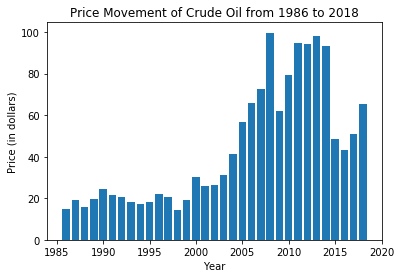

In [46]:
# Visual representation of the Price movement of Crude Oil
# Import matplotlib library
import matplotlib.pyplot as plt

plt.bar(df_crude_oil['Year'],spot_price)
plt.title("Price Movement of Crude Oil from 1986 to 2018")
plt.xlabel("Year")
plt.ylabel("Price (in dollars)")
plt.show()

> #### EXAMPLE 2: Bank Failures - 2001 through 2019

    This dataset includes banks which have failed since October 1, 2000.
    This includes information on the acquiring bank (if applicable).
    
    Column Descriptions :
    1. BankName : Name of the Bank
    2. City     : City where the Bank headquarters was located
    3. ST       : State where the Bank headquarters was located
    4. CERT     : FDIC Certificate Number. A unique number assigned by the FDIC used to identify institutions
                    and for the issuance of insurance certificates.
    5. AcquiringInstitution : Successor Institution or the institution that acquired the bank.
    6. ClosingDate : Bank Inactive as of this date
    7. UpdatedDate : Last Updated Date
    
    Reference : https://www.fdic.gov/bank/individual/failed/banklist.html
    

In [47]:
# Lets load a pandas dataframe and analyze aggregate statistics
# Loading banklist.csv
df_banklist = pd.read_csv("../Data/banklist.csv",encoding="latin")
df_banklist.ClosingDate = pd.to_datetime(df_banklist.ClosingDate,format="%d-%b-%y")

# Consider a subset of the dataframe with Bank Name, City, State and Closing Date 
df_banklist.head()

,BankName,City,ST,CERT,AcquiringInstitution,ClosingDate,UpdatedDate
0,1st American State Bank of Minnesota,Hancock,MN,15448,"Community Development Bank, FSB",2010-02-05,1-Nov-13
1,1st Centennial Bank,Redlands,CA,33025,First California Bank,2009-01-23,1-Feb-19
2,1st Commerce Bank,North Las Vegas,NV,58358,Plaza Bank,2013-06-06,8-Aug-18
3,1st Pacific Bank of California,San Diego,CA,35517,City National Bank,2010-05-07,31-Jan-19
4,1st Regents Bank,Andover,MN,57157,First Minnesota Bank,2013-01-18,12-Jul-16


> **Masking Operations and Aggregates**
 
     By combining masking operations with aggregates we can evaluate lot of compound operations 
     such as total number of any occurence, multiple conditional statements and so on.
     
     Lets consider example 2, the dataset of banks that closed in United States during 2000 to 2019.
     For instance, we can evaluate the number of banks that closed in any particular city or state using 
     masking and aggregates.
     

In [48]:
# Creating arrays for state and city column
state = np.array(df_banklist['ST'])
city = np.array(df_banklist['City'])
year = np.array(pd.DatetimeIndex(df_banklist['ClosingDate']).year)
bankname = np.array(df_banklist['BankName'])
month = np.array(pd.DatetimeIndex(df_banklist['ClosingDate']).month)

# To find the number of banks closed in the state of California and Illinois
print(f'Number of banks closed in Chicago,Illinois : {np.sum((state=="IL") & (city=="Chicago"))}')

print(f'Number of banks closed in the state of Illinois : {np.sum((state=="IL"))}')

Number of banks closed in Chicago,Illinois : 20
Number of banks closed in the state of Illinois : 69


    Thus,we can infer from the above result that around 30% of banks that closed in the state of Illinois were 
        in Chicago

> **Boolean Masks**

      By combining Boolean operations, masking operations, and aggregates, we can accomplish 
      even more complex tasks.
      Lets again consider the example of banks that closed in United States between 2000-2019.
      
      - Which all Banks closed during The Great Recession(i.e. between December 2007 and June 2009)?
      - How many banks closed during the period following The Great Recession?
      To evaluate queries like the ones listed above, we can combine Boolean operations with masking operations and 
      use aggregates.
      
      We will consider the Recession Timeline as per the National Bureau of Economic Research.
      Recession : between December 2007 and June 2009
      Post Recession : between July 2009 and December 2012


In [49]:
# Constructing a mask for recession time and the years that followed recession
# Recession Timeline as per the National Bureau of Economic Research  
recession = (((month==12)& (year==2007))| (year==2008)| ((year==2009) & (month<=6)))
postrecession = (((month>6)& (year==2009))| (year>=2010) & (year<=2012))

# To compute the number of banks that closed during the period following The Great Recession 
print(f'Number of banks that closed post recession : {np.sum(np.bincount(year[postrecession]))}')


Number of banks that closed post recession : 395


    This implies that, out of 555 banks that closed during 2000-2019, approximately 70% of the banks closed during the period following The Great Recession 

### <center>Set Operations</center>

    One of the other useful methods is the np.unique that returns the sorted unique values in an array.
    To demonstrate the set operations, let us consider the above example of a list of banks that closed from 
    2000-2019.
    
    We can use np.unique to find the number of banks that closed each year by using an optional argument 
    "return_counts" and setting it as True.
    
    The other set operations are:
    
    np.in1d()
    np.intersect1d()
    np.union1d()
    np.setdiff1d()
    np.setxor1d()
    
    The examples for each of the 6 set operations can be noted below.

In [50]:
# Consider an array of midwestern states 
midwest = np.array(['ND','SD','NE','KS','MN','IA','MO','IL','WI','IN','OH','MI'])
midwest

array(['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'IL', 'WI', 'IN', 'OH',
       'MI'], dtype='<U2')

In [51]:
# Returns an array of unique items along with the counts 
unq ,cnt = np.array(np.unique(year,return_counts=True))
print(f"Unique Items :\n{unq}")
print(f"\nBanks closed in the corresponding year :\n{cnt}")

# We can compute which year most banks closed
print(f"\nThe year when most banks closed :\n{unq[np.argmax(cnt)]}")

Unique Items :
[2000 2001 2002 2003 2004 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2019]

Banks closed in the corresponding year :
[  2   4  11   3   4   3  25 140 157  92  51  24  18   8   5   8   1]

The year when most banks closed :
2010


In [52]:
# in1d (x,y) computes boolean array indicating if the elements in x is contained in y
# Computes the state in midwest with highest bank failures
unq_midwest, cnt_midwest = np.unique(state[np.in1d(state,midwest)],return_counts=True)
print(f"State with highest bank failures in midwest :{unq_midwest[np.argmax(cnt_midwest)]}")
print(f"Total number of bank failures in {unq_midwest[np.argmax(cnt_midwest)]} is {np.max(cnt_midwest)}")


State with highest bank failures in midwest :IL
Total number of bank failures in IL is 69


In [53]:
# intersect1d (x,y) computes the common elements in x and y in sorted order
# Computes the midwest states that were impacted due to recession
print(f'States that were impacted during recession in the midwest : {np.intersect1d(state[recession],midwest)}')

# union1d (x,y) computes union of elements in sorted order
# Computes the states that were impacted during recession and post recession
print(f'\nStates that were impacted during and immidiately after recession: \n{np.union1d(state[recession],state[postrecession])}')


States that were impacted during recession in the midwest : ['IL' 'KS' 'MI' 'MN' 'MO' 'NE']

States that were impacted during and immidiately after recession: 
['AL' 'AR' 'AZ' 'CA' 'CO' 'FL' 'GA' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA'
 'MA' 'MD' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK'
 'OR' 'PA' 'PR' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'WA' 'WI' 'WV' 'WY']


In [54]:
# setdiff1d (x,y) computes elements in x that are not in y 
# Computes banks in California that closed in times other than recession and post recession.
print("Banks in California that closed before December 2007 and after December 2012 : ")
print(f"{np.setdiff1d(bankname[np.in1d(state,['CA'])],np.union1d(bankname[recession],bankname[postrecession]))}\n")


# setxor1d (x,y) computes the elements in either x or y but not in both
# Computes banks that closed in midwest other than those in Illinois state in the year 2017
print("Banks that closed in 2017 other than in Illinois state :")
print(np.setxor1d(bankname[np.in1d(year,2017) & np.in1d(state,['IL'])],
            bankname[np.in1d(year,2017) & np.in1d(state,midwest)]))

Banks in California that closed before December 2007 and after December 2012 : 
['Frontier Bank, FSB D/B/A El Paseo Bank' 'Southern Pacific Bank']

Banks that closed in 2017 other than in Illinois state :
['Guaranty Bank, (d/b/a BestBank in Georgia & Michigan)'
 'The Farmers and Merchants State Bank of Argonia']


### <center>Other Topics</center>

> #### np.where

    Return elements chosen from x or y depending on condition.

In [55]:
# Lets consider the dataset of failed banks to demonstrate np.where()
# Lists the failed banks that are not acquired till date
bankname[np.where(df_banklist['AcquiringInstitution']=='No Acquirer')]

array(['Advanta Bank Corp.', 'AmTrade International Bank',
       'Arcola Homestead Savings Bank', 'Bank of Alamo',
       'Bank of the Eastern Shore', 'Barnes Banking Company',
       'Centennial Bank', 'Citizens State Bank',
       'Community Bank of Nevada', 'Community Bank of West Georgia',
       'Dollar Savings Bank', 'Enterprise Banking Company',
       'First Arizona Savings, A FSB', 'First Bank of Beverly Hills',
       'FirstCity Bank', 'FirsTier Bank', 'Home Savings of America',
       'Ideal Federal Savings Bank', 'Lakeside Community Bank',
       'MagnetBank', 'New Century Bank', 'New City Bank',
       'New Frontier Bank', 'NextBank, NA', 'NOVA Bank',
       'Omni National Bank', 'Platinum Community Bank',
       'RockBridge Commercial Bank', 'Silverton Bank, NA',
       "The Community's Bank", 'Waterfield Bank'], dtype=object)

> #### np.count_nonzero

    np.count_nonzero is useful,to count number of True entries or non-zero elements in a NumPy array

In [56]:
# To compute, the number of banks that closed during The Great Recession (i.e. between 2008 and 2012)
# np.count_nonzero counts the number of True entries in this case
np.count_nonzero(bankname[(((month==12)& (year==2007))| (year==2008)| ((year==2009) & (month<=6)))])

70